In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

# Part 1

In [2]:
data = pd.read_csv('hw2_1.csv')

data.head()

,device,rank,app_store,region,app_age_current_version,app_type,price,filesize,num_screenshot,rating_count,average_rating,category,in_app_ads,in_app_purchase
0,smart_phone,260,Apple,CN,11,free,0.0000,15.3,5,302,4.5,Social,NO_IN_APP_ADS,NO_IN_APP_PURCHASE
1,smart_phone,368,Apple,CN,14,free,0.0000,8.7,10,2455,5.0,Social,NO_IN_APP_ADS,NO_IN_APP_PURCHASE
2,smart_phone,355,Apple,CN,51,free,0.0000,25.4,10,117,3.0,Social,NO_IN_APP_ADS,NO_IN_APP_PURCHASE
3,smart_phone,165,Google Play,US,21,paid,3.8042,294.0,5,647,4.5,Games,NO_IN_APP_ADS,NO_IN_APP_PURCHASE
4,smart_phone,211,Google Play,CN,39,free,0.0000,6.8,5,567,3.3,Social,IN_APP_ADS,NO_IN_APP_PURCHASE


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18624 entries, 0 to 18623
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   device                   18624 non-null  object 
 1   rank                     18624 non-null  int64  
 2   app_store                18624 non-null  object 
 3   region                   18624 non-null  object 
 4   app_age_current_version  18624 non-null  int64  
 5   app_type                 18624 non-null  object 
 6   price                    18624 non-null  float64
 7   filesize                 18624 non-null  float64
 8   num_screenshot           18624 non-null  int64  
 9   rating_count             18624 non-null  int64  
 10  average_rating           18624 non-null  float64
 11  category                 18624 non-null  object 
 12  in_app_ads               18624 non-null  object 
 13  in_app_purchase          18624 non-null  object 
dtypes: float64(3), int64(4

In [4]:
len(data.drop_duplicates())

18624

### Question 1
<f>Using the data, estimate a linear model for the relationship between demand and price. For this you have access to a large volume of app level data (in a file called **hw2_1.csv**), including information about the ‘rank’ of the app on the app store. Assume Sales = (1/rank)*1,000,000 (don’t worry about the details behind this assumption, just make the assumption). Specifically, estimate a univariate regression where the dependent variable is sales and the independent variable is price:
$Sales = \beta_0 +\beta_1 * Price$</f>

a. Report the estimated intercept and the estimated slope coefficient.

**Answer**

$Sales = 20,703.82797 - 469.785008*Price$

intercept is 20703.827970<br>
slope is  -469.785008

In [5]:
data['Sales'] = (1/data['rank'])*1000000

In [6]:
result_1a = sm.ols('Sales ~ price', data = data).fit()

result_1a.params

Intercept    20703.827970
price         -469.785008
dtype: float64

b. Test the following null hypothesis: $\beta_1 = 0$. Use a 5% significance level.
Provide an explanation of your answer.

**Answer**

As seen in the result below, P-value of price variable is 0.000 which lower than alpha 0.05. Hence, I can reject Null Hypothesis at 5% significance level and conclude that price variable impcat sales.

In [7]:
print(result_1a.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     13.06
Date:                Sun, 21 Nov 2021   Prob (F-statistic):           0.000302
Time:                        15:13:41   Log-Likelihood:            -2.3509e+05
No. Observations:               18624   AIC:                         4.702e+05
Df Residuals:                   18622   BIC:                         4.702e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.07e+04    586.506     35.300      0.0

## Question 2
<f> Create a dummy/binary variable for region. This variable should have a value of 0 if the region is CN (China) and 1 if the region is US (USA). Estimate a univariate regression of sales on this newly created variable. Provide a screenshot and an interpretation of both estimated coefficients. Be specific</f>

**Answer**

Interception is 17,630 which means that the average sales of applications in China store is $17,630.

Coefficicient of region is 5,114.4716 with p-value 0.000. This means that region effect the sales. When the applications appear in the US store, the sales will increase $5,114.4716. In other words, the average sales of applications in US store is $17,630 + $5,114.4716 = $22,744.4716.

In [8]:
data['dummy_reg'] = [1 if i == 'US' else 0 for i in data['region']]

# data.head()

In [9]:
result2 = sm.ols('Sales ~ dummy_reg', data = data).fit()

print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     22.22
Date:                Sun, 21 Nov 2021   Prob (F-statistic):           2.45e-06
Time:                        15:13:41   Log-Likelihood:            -2.3509e+05
No. Observations:               18624   AIC:                         4.702e+05
Df Residuals:                   18622   BIC:                         4.702e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.763e+04    716.421     24.610      0.0

## Question 3

Create another dummy/binary variable for in app advertisements (in_app_ads). This variable should have a value of 1 if the device has in app advertising and a value of 0 if the device does NOT have in app advertising. Estimate a regression of sales on the dummy variable created in part 2 and this newly created dummy variable (all in the same model). Provide a screenshot of the results and provide an interpretation of all the coefficients. Be Specific.

**Answer**

Interception is 16,540. This means that the average sales of applications that are in China store and do not have in-app advertisement is $16,540.

Coefficient of region is 4964.4506. This means that the average sales of applications in US store is $4964.4506 more than those in China store.

Coefficient of in-app advertisement is 3910.1267. This means that applications that have in-app advertisements have average sales $3,910.1267 more than those that do not have in-app advertisement.

The average sales:
| Region/In-app advertisement | Have in-app advertisement | Do not have in-app advertisement |
| --- | --- | --- |
| US | $25,414.5773 | $21,504.4506 |
| China | $20,450.1267 | $16,540 |

In [10]:
data['dummy_in_app_ads'] = [1 if i == 'IN_APP_ADS' else 0 for i in data['in_app_ads']]

# data.head()

In [11]:
result3 = sm.ols('Sales ~ dummy_reg + dummy_in_app_ads', data = data).fit()

print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     16.61
Date:                Sun, 21 Nov 2021   Prob (F-statistic):           6.23e-08
Time:                        15:13:41   Log-Likelihood:            -2.3508e+05
No. Observations:               18624   AIC:                         4.702e+05
Df Residuals:                   18621   BIC:                         4.702e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.654e+04    788.140  

## Question 4
Estimate a univariate regression of sales on price (similar to part 1) except in this case your model should able to speak in terms of elasticity. By elasticity you want to speak to your management in percentage terms – what is the % change in sales for a % increase in price? (Tip: we do this using log-log-regression models.) Since price can have a value of 0, you will have to adjust the variable. You can do this by adding 1 to each price and then taking the log. Provide a screenshot of the results and provide an **interpretation** for all the coefficients. Be specific.

**Answer**

From the coefficient of price we can imply that when price increases by 1%, sales will decrease 0.0617%.

From the interception, when price is equal to 0, expected sales is exp(8.9709).

In [12]:
data_q4 = data[['Sales','price']]
data_q4['adjusted_price'] = data_q4['price'] + 1
data_q4['log_sales'] = np.log(data['Sales'])
data_q4['log_price'] = np.log(data_q4['adjusted_price'])

# data_q4.head()

/var/folders/1c/xy5l3bvx653590381s90cwv80000gn/T/ipykernel_53584/1500619858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_q4['adjusted_price'] = data_q4['price'] + 1
/var/folders/1c/xy5l3bvx653590381s90cwv80000gn/T/ipykernel_53584/1500619858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_q4['log_sales'] = np.log(data['Sales'])
/var/folders/1c/xy5l3bvx653590381s90cwv80000gn/T/ipykernel_53584/1500619858.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [13]:
result4 = sm.ols('log_sales ~ log_price', data = data_q4).fit()

print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:              log_sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     38.35
Date:                Sun, 21 Nov 2021   Prob (F-statistic):           6.03e-10
Time:                        15:13:41   Log-Likelihood:                -26834.
No. Observations:               18624   AIC:                         5.367e+04
Df Residuals:                   18622   BIC:                         5.369e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9709      0.010    899.535      0.0

## Question 5

The app retailer believes that other factors, specifically the filesize, the number of screenshots, and the average rating may also be associated with both sales and price. The retailers want a model that estimates the relationship between price and sales (similar to 4) except they want the impact of the above-mentioned factors to be controlled for. Estimate a model that accomplishes this. Your model should speak in terms of elasticity (same as part 4). Provide screenshots of your results and discuss how this model achieves what the retailers want. Provide an interpretation of all the estimated coefficients.

**Answer**

Assumed we controlled all variable except price and sales. Thus, filesize, number of screenshots, and average rating remain constant when price change.

Coefficient of log(price) is -0.0678 and p-value is 0.000. We can imply that if price increase 1% and other variables remains at the same point, sales will decrease by 0.0678%.

Interpretaion for interception and other variables:

Interception: if all variables are equal to 0. The expected sales is exp(8.7695).

Coefficient of filesize is 0.00008758 with which means that if the filesize increases by 1 unit, the sales will increase 0.008758%. For the p-value this is not statistically significant at alpha 0.01 but this is statistically significant at alpha 0.05.

Coefficient of number of screenshots is -0.0009 which means that if the number of screenshots increases by 1 unit, the sales will decrease 0.09%. However, the p-value is more than 0.05, so this is not statistically significant.

Coefficient of average rating is 0.0487 and p-value is 0.000. We can imply that if there is 1 unit increase in average rating and other variables remains at the same point, sales will increase 4.87%.

In [14]:
data_q5 = pd.concat([data_q4,data[['filesize','num_screenshot','average_rating']]], axis = 1)

# data_q5.head()

In [15]:
result5 = sm.ols('log_sales ~ log_price+filesize+num_screenshot+average_rating',data = data_q5).fit()

print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:              log_sales   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     20.54
Date:                Sun, 21 Nov 2021   Prob (F-statistic):           6.59e-17
Time:                        15:13:41   Log-Likelihood:                -26812.
No. Observations:               18624   AIC:                         5.363e+04
Df Residuals:                   18619   BIC:                         5.367e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.7695      0.040    219.

## Question 6

The retailer is also interested in understanding the impact of the in-app purchase option. Specifically, the retailer believes that the relationship between price and sales is different for apps with an in-app purchase option and apps without an in-app purchase option. To do this, estimate the same model that you estimated in part 5 except add an interaction term between price and in app purchase option (dummy variable). Provide the results and an interpretation of all the estimated coefficients. Be specific.

**Answer**

Interception: if all variables are equal to 0. The expected sales is exp(8.7850).

Coefficient of log(price) is -0.0883 and p-value is 0.000. We can imply that if price increase 1% and other variables remains at the same point, sales will decrease by 0.0883%.

Coefficient of interaction between price and in-app purchase is 0.0747 and p-value is 0.000. We can conclude that if applications have an in-app purchase option and price increase by 1%, sales will increase 0.0163%.

Coefficient of filesize is 0.0002812 which means that if the filesize increases by 1 unit, the sales will increase 0.02812%. However, the p-value is more than 0.05, so this is not statistically significant.

Coefficient of number of screenshots is -0.0009 which means that if the number of screenshots increases by 1 unit, the sales will decrease 0.09%. However, the p-value is more than 0.05, so this is not statistically significant.

Coefficient of average rating is 0.0447 and p-value is 0.000. We can imply that if there is 1 unit increase in average rating and other variables remains at the same point, sales will increase 4.47%.

In [16]:
data_q6 = pd.concat([data_q5,data['in_app_purchase']],axis = 1)
data_q6['have_in_app_purchase'] = [1 if i == 'PLUGIN_PURCHASE' else 0 for i in data_q6['in_app_purchase']]
data_q6['pricepurchase'] = data_q6['price']*data_q6['have_in_app_purchase']
data_q6['log_pricepurchase'] = np.log(data_q6['pricepurchase']+1)

# data_q6.head()

In [17]:
result6 = sm.ols('log_sales ~ log_price+filesize+num_screenshot+average_rating+log_pricepurchase',data = data_q6).fit()

print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:              log_sales   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     20.53
Date:                Sun, 21 Nov 2021   Prob (F-statistic):           1.66e-20
Time:                        15:13:41   Log-Likelihood:                -26801.
No. Observations:               18624   AIC:                         5.361e+04
Df Residuals:                   18618   BIC:                         5.366e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.7850      0.04

# Part 2

## Excercise 1
You are interested in examining whether visitors to your website spend, on average, more than 12 minutes browsing the website. While you had not previously kept track of website visitors, you start tracking after deciding that you want this information. In the file **exercise_1.csv**, you will find the minutes spent browsing for a sample of 24 website visitors. Use this data to statistically evaluate whether, on average, website visitors spend more than 12 minutes browsing on your website. Be specific about your approach (set your alpha-level at 0.05). State the null/alternative hypothesis and your conclusion.

**Answer**

I will use t-test for this exercise because the sample is less than 24

*Hypothesis:*<br>
$H_0$: Website visitors spend less than or eqaul to 12 minutes on the website.<br>
$H_1$: Website visitors spend more than 12 minutes on the website.

From the result below,
P-value is 0.046 which less than 0.05. Thus, we can reject $H_0$ and conclude that the visitors spend more than 12 minutes on the website.

In [18]:
from scipy.stats import ttest_1samp

In [19]:
data_ex1 = pd.read_csv('exercise_1.csv',header = None)
data_ex1.columns = ['time']

# data_ex1.head()

In [20]:
result_21 = ttest_1samp(data_ex1, 12, alternative = 'greater')

print(result_21.pvalue[0])

0.045989713634792644


# Exercise 2

In [21]:
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data_ex2 = pd.read_csv('exercise_2.csv')

# data_ex2.head()

a. Evaluate whether the new website design visits are statistically more likely to end in a sale than the visits to the original website design. You do not need to include other variables in your model since the customers were randomly assigned. Be specific about your approach (set your alpha-level at 0.05). State the null/alternative hypothesis and your conclusion.

**Answer**

In this case I will use proportion test to see whether the new website design result in greater proportion of customer who made purchase.

*Hypothesis:*<br>
$H_0$: Proportion of purchased visitors who landed on the new website is less than or equal to those of the old website.<br>
$H_1$: Proportion of purchased visitors who landed on the new website is greater than or equal to those of the old website.

After running the z-test, p-value is 0.00013. Hence, we can reject $H_0$ and conclude that visitors in the new website more likely made purchase during the visit. 

In [23]:
zstat, p_value = proportions_ztest(count= np.array([data_ex2[data_ex2['website_design'] == 0]['sale_1_0'].sum(),data_ex2[data_ex2['website_design'] == 1]['sale_1_0'].sum()])
                                   ,nobs=np.array([data_ex2[data_ex2['website_design'] == 0]['sale_1_0'].count(),data_ex2[data_ex2['website_design'] == 1]['sale_1_0'].count()])
                                   ,alternative = 'smaller')

p_value

0.00013372021544684026

b. Examine whether there is a statistical difference between the mean of minutes_spent for the subset of consumers that were sent to the new website design and the subset that were sent to the original website design. You do not need to include other variables in your model since the customers were randomly assigned. Be specific about your approach (set you alpha-level at 0.05). State the null/alternative hypothesis and your conclusion.

**Answer**

Before performing the test, I cleaned data by excluding the records that have minutes_spent less than zero. Then, I used two-sided t-test to test whether time spent of visitors in new website differs from that of visitors in old website.

*Hypothesis*<br>
$H_0$: Average time spent of visitors in new website equal to that of old website.<br>
$H_1$: Average time spent of visitors in new website differ from that of old website.

After perform the test, p-value is nearly 0.000. Thus, I can reject $H_0$ and conclude that the average time spent of visitors of new website differ from that of old website.

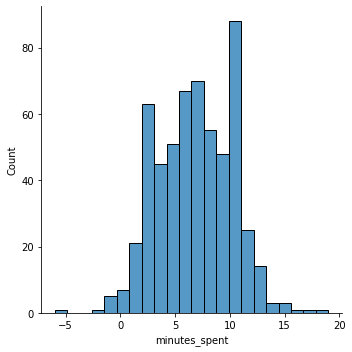

In [24]:
sns.displot(data_ex2['minutes_spent'])

plt.show()

In [25]:
# Exclude minutes spent which less than 0 (exclude 7 rows out of 600 or around 1% of data)
sum(data_ex2['minutes_spent'] < 0)

data_ex2_clean_min = data_ex2[data_ex2['minutes_spent'] > 0]

In [26]:
time_spent_old = np.array(data_ex2_clean_min[data_ex2_clean_min['website_design'] == 0]['minutes_spent'])
time_spent_new = np.array(data_ex2_clean_min[data_ex2_clean_min['website_design'] == 1]['minutes_spent'])
zstat, p_value = ttest_ind(time_spent_old
                           ,time_spent_new
                           ,alternative = 'two-sided')

p_value

2.007968754671815e-10

c. There is concern that there may have been a programming error regarding the random assignment of consumers. Specifically, it may be that the selection of the 10% of customer traffic that was directed to the newly designed website was not random. Does the data suggest that this concern is legitimate? Even if it was not random, does the data suggest that our conclusions about the new website design observed in **part a** should change? Be specific about your approach (set you alpha-level at 0.05). State the null/alternative hypothesis and your conclusion.

**Answer**

I focused on member because it is the only thing the company knows before the selection. I used chi-squared test of independent to test whether website design and member status related.

*Hypothesis*<br>
$H_0$: website design and member status are independent.<br>
$H_1$: website design and member status are not independent.

P-value that I got from chi-squared is nearly 0.00. Thus, I can reject $H_0$ and conclude that website design and member status are not independent. In other words, the selection of customers directed to new website design is not random.

I then perform a proportion test for proportion of sales in each member type. I found that p-value of both member type are significantly large amount. This leads to change in result in part a. I then tested wheter the membership impact the sales rate. I got p-value nearly 0.000 and can conclude that the visitors who are members more likely to make purchase regardless the website design.

To conclude, the type of member ship impact the sales rate. The company tends to choose member to land on the new website. Thus, the company cannot conclude that new website design lead to higher rate of sales.

In [27]:
member = np.array(data_ex2[data_ex2['member']==1]['website_design'].value_counts())
non_member = np.array(data_ex2[data_ex2['member']==0]['website_design'].value_counts())

In [28]:

# Test Hypothesis for independence
test_stat, p_value, df, data  = chi2_contingency([member,non_member])

p_value


2.3140740608613126e-17

In [29]:
# Test sale proportion for member
zstat, p_value = proportions_ztest(count= np.array([data_ex2[(data_ex2['member'] == 1) & (data_ex2['website_design'] == 0)]['sale_1_0'].sum(),data_ex2[(data_ex2['member'] == 1) & (data_ex2['website_design'] == 1)]['sale_1_0'].sum()])
                                   ,nobs=np.array([data_ex2[(data_ex2['member'] == 1) & (data_ex2['website_design'] == 0)]['sale_1_0'].count(),data_ex2[(data_ex2['member'] == 1) & (data_ex2['website_design'] == 1)]['sale_1_0'].count()])
                                   ,alternative = 'smaller')

p_value

0.535649477718982

In [30]:
# Test sale proportion for non-member
zstat, p_value = proportions_ztest(count= np.array([data_ex2[(data_ex2['member'] == 0) & (data_ex2['website_design'] == 0)]['sale_1_0'].sum(),data_ex2[(data_ex2['member'] == 0) & (data_ex2['website_design'] == 1)]['sale_1_0'].sum()])
                                   ,nobs=np.array([data_ex2[(data_ex2['member'] == 0) & (data_ex2['website_design'] == 0)]['sale_1_0'].count(),data_ex2[(data_ex2['member'] == 0) & (data_ex2['website_design'] == 1)]['sale_1_0'].count()])
                                   ,alternative = 'smaller')

p_value

0.7918251644314425

In [38]:
# Test sale proportion by type of member
zstat, p_value = proportions_ztest(count= np.array([data_ex2[(data_ex2['member'] == 1)]['sale_1_0'].sum(),data_ex2[(data_ex2['member'] == 0)]['sale_1_0'].sum()])
                                   ,nobs=np.array([data_ex2[(data_ex2['member'] == 1)]['sale_1_0'].count(),data_ex2[(data_ex2['member'] == 0)]['sale_1_0'].count()])
                                   ,alternative = 'two-sided')

zstat, p_value

(10.931853818047788, 8.117293709207258e-28)

d. The company is worried that the introduction of the new features (more product pictures and zoom feature) is having an impact on customers returning the products they purchased. Statistically examine the impact of the new website design on returns.

**Answer**

I use proportion test to test whether the percentage of visitors who returned the products between new and old website desigh is different.

*Hypothesis*<br>
$H_0$: Proportion of returned products of new website design is not differ from those of old website design.<br>
$H_0$: Proportion of returned products of new website design is differ from those of old website design.

From the test for all data, z-score is -4.50 and p-value is approximately 0.000. Thus, we can reject $H_0$ and conclude that visitors in new website design are more likely to return products. However, as stated in part c that the selection is not random, I divided the data into two groups, non-member and member, and performed the test again. Surprisingly, the p-value for both group are 0.55 and 0.22. This means that I cannot reject $H_0$. I then test the return proportion to see if there is any different between member and non-member customers. I got z-score 7.33 and p-value approximately 0.000. I can conclude that customers who are member are more likely to return the products, regardless the website design.

In conclusion, the company directed more member to new website design than non-member and the type of membership impact the return rate. Because of these effects, the company cannot prove that the website design impact the products return rate.



In [31]:
# Test return proportion for overall
zstat, p_value = proportions_ztest(count= np.array([data_ex2[(data_ex2['website_design'] == 0)]['return_1_0'].sum(),data_ex2[(data_ex2['member'] == 1)]['return_1_0'].sum()])
                                   ,nobs=np.array([data_ex2[(data_ex2['website_design'] == 0)]['return_1_0'].count(),data_ex2[(data_ex2['member'] == 1)]['return_1_0'].count()])
                                   ,alternative = 'two-sided')

zstat, p_value

(-4.501296433526966, 6.75402320085793e-06)

In [32]:
# Test return proportion for non-member
zstat, p_value = proportions_ztest(count= np.array([data_ex2[(data_ex2['member'] == 0) & (data_ex2['website_design'] == 0)]['return_1_0'].sum(),data_ex2[(data_ex2['member'] == 0) & (data_ex2['website_design'] == 1)]['return_1_0'].sum()])
                                   ,nobs=np.array([data_ex2[(data_ex2['member'] == 0) & (data_ex2['website_design'] == 0)]['return_1_0'].count(),data_ex2[(data_ex2['member'] == 0) & (data_ex2['website_design'] == 1)]['return_1_0'].count()])
                                   ,alternative = 'two-sided')

zstat, p_value

(0.6025109040558653, 0.5468341071264461)

In [33]:
# Test return proportion for member
zstat, p_value = proportions_ztest(count= np.array([data_ex2[(data_ex2['member'] == 1) & (data_ex2['website_design'] == 0)]['return_1_0'].sum(),data_ex2[(data_ex2['member'] == 1) & (data_ex2['website_design'] == 1)]['return_1_0'].sum()])
                                   ,nobs=np.array([data_ex2[(data_ex2['member'] == 1) & (data_ex2['website_design'] == 0)]['return_1_0'].count(),data_ex2[(data_ex2['member'] == 1) & (data_ex2['website_design'] == 1)]['return_1_0'].count()])
                                   ,alternative = 'two-sided')

zstat, p_value

(1.2314090654388625, 0.21816990810018433)

In [34]:
# Test return proportion between each member type
zstat, p_value = proportions_ztest(count= np.array([data_ex2[(data_ex2['member'] == 1)]['return_1_0'].sum(),data_ex2[(data_ex2['member'] == 0)]['return_1_0'].sum()])
                                   ,nobs=np.array([data_ex2[(data_ex2['member'] == 1)]['return_1_0'].count(),data_ex2[(data_ex2['member'] == 0)]['return_1_0'].count()])
                                   ,alternative = 'two-sided')

zstat, p_value

(7.334150265369788, 2.2313263492972675e-13)